<a href="https://colab.research.google.com/github/arunm917/CS6910_Assignment1/blob/main/CS6910_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [2]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm.notebook import trange, tqdm
from sklearn.metrics import mean_squared_error

# Data preprocessing

In [3]:
# X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
# Y = [1, 1, 1, 0, 0, 0]
# downloading existing perovskite file from gdrive
output = 'mobile data'
file_id = '14ZgjTbautWSaKS3EhkK6HzfLE_qeGRx9' # Google drive ID
#Download the file
gdown.download('https://drive.google.com/uc?id=' + file_id, output, quiet=False)
print('DONE.')

Downloading...
From: https://drive.google.com/uc?id=14ZgjTbautWSaKS3EhkK6HzfLE_qeGRx9
To: /content/mobile data
100%|██████████| 69.7k/69.7k [00:00<00:00, 23.1MB/s]

DONE.


In [4]:
data = pd.read_csv('mobile data')

In [5]:
data.shape

(341, 88)

In [6]:
X = data.drop('Rating', axis = 1)

In [7]:
Y = data['Rating'].values # Rating is out of 5

In [8]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [9]:
threshold = 4.2
data['class'] = (data['Rating'] >= threshold).astype(np.int)

<ipython-input-9-34a1b5c4b940>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['class'] = (data['Rating'] >= threshold).astype(np.int)


In [10]:
data['class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [11]:
Y_binarised = data['class'].values

In [12]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, random_state = 0, stratify = Y_binarised)

In [13]:
print(X_train.shape)
print(X_test.shape)

(255, 87)
(86, 87)


### Standardization

In [14]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [15]:
minmax_scaler = MinMaxScaler()
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [16]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [17]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Initializations

In [117]:
# class Initialization:
#   W = np.random.randn(1, X_scaled_train.shape[1])
#   b = 0
  
# initial = Initialization()  #Instantiation for the class initialization

# Hyperparameters

In [18]:
class Hyperparameters:
  epochs = 2000
  eta    = 0.015

hyper = Hyperparameters()

# Activation functions

In [63]:
class ActivationFunctions:

  def linear(self,W,b,x):
    return (np.dot(x,W.T) + b)

  def sigmoid(self, W, b, x):
    return 1/(1+np.exp(-(np.dot(x,W.T) + b)))

act = ActivationFunctions()

# Loss Functions

In [20]:
class Loss:
  def MSE(self, y, y_pred):
    return (np.sum((y-y_pred)**2))/len(y)

loss = Loss()

# Gradients

In [21]:
class Gradients():

  def grad_w (self, W, b, x, y):
      y_pred = act.sigmoid(W, b, x)
      #print('y_pred',y_pred)
      return (y_pred - y)*y_pred*(1-y_pred)*x
  
  def grad_b (self, W, b, x, y):
      y_pred = act.sigmoid(W, b, x)
      return (y_pred - y)*y_pred*(1-y_pred)

grad = Gradients()

# Forward popagation

# Back Propagation

# Learning Algorithms

In [42]:
class LearningAlgorithms:

  def gd(self, X, Y):

    W = np.random.randn(1, X.shape[1])
    b = 0
    loss_gd = []

    for i in trange(hyper.epochs, total=hyper.epochs, unit="epoch"):
      dw = 0
      db = 0
      
      for x,y in zip(X,Y):
        dw += grad.grad_w(W,b,x,y)
        db += grad.grad_b(W,b,x,y)

      W -= hyper.eta*dw
      b -= hyper.eta*db
      Y_pred = act.sigmoid(W, b, X)
      loss_gd.append(loss.MSE(Y, Y_pred))
      #print('W',W,'b',b)
      #print('loss', loss.MSE(Y, Y_pred))

    plt.plot(loss_gd)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()

la = LearningAlgorithms()

# Train

  0%|          | 0/2000 [00:00<?, ?epoch/s]

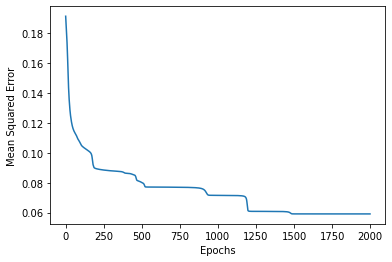

In [64]:
la.gd(X_scaled_train, Y_scaled_train)

In [35]:
X_scaled_train.shape

(255, 87)

In [36]:
X.shape[1]

87